    period  minutes_remaining  seconds_remaining  secondsFromGameStart
0        1                 10                 22                    98
1        1                  7                 45                   255
2        1                  6                 52                   308
3        2                  6                 19                  1061
4        3                  9                 32                  1588
5        3                  8                 52                  1628
6        3                  6                 12                  1788
7        3                  3                 36                  1944
8        3                  1                 56                  2044
9        1                 11                  0                    60
10       1                  7                  9                   291
11       1                  2                 44                   556
12       1                  1                 16                   644
13    

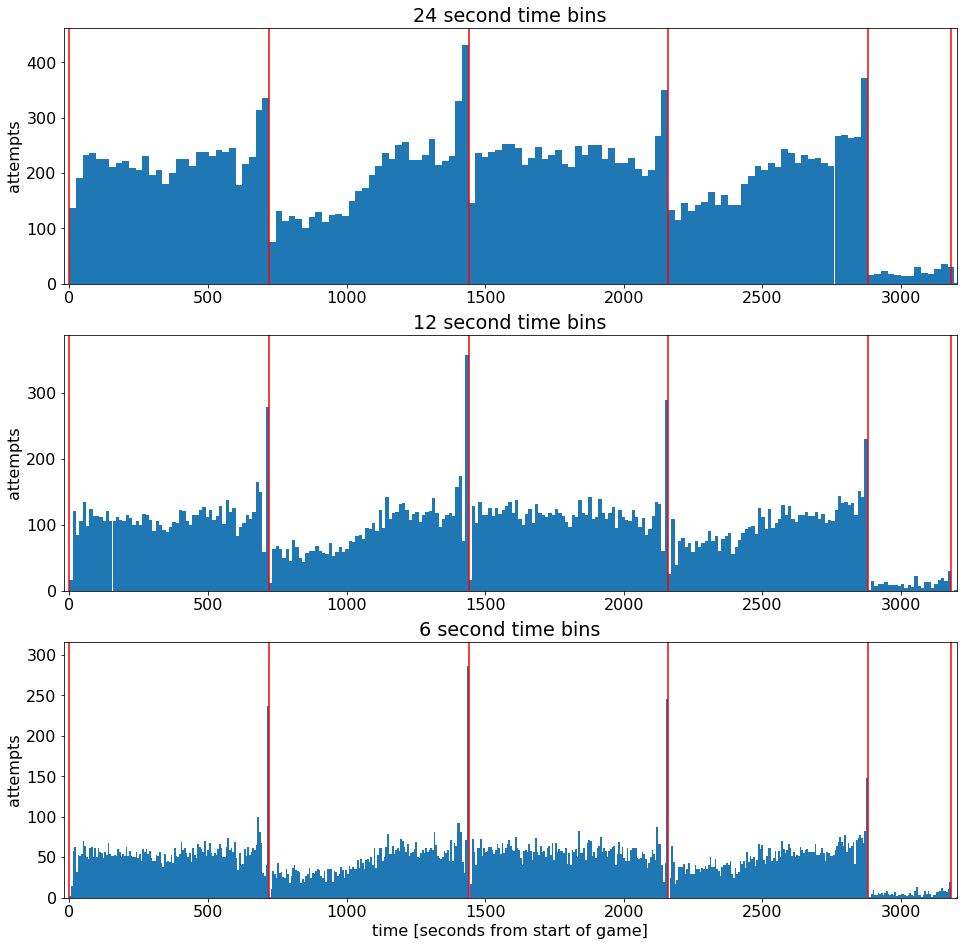

In [1]:
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

allData = pd.read_csv('./data.csv', encoding='utf-8-sig')
# 
data = allData[allData['shot_made_flag'].notnull()].reset_index()

# some temporal columns to the data
data['game_date_DT'] = pd.to_datetime(data['game_date'])
data['dayOfWeek']    = data['game_date_DT'].dt.dayofweek
data['dayOfYear']    = data['game_date_DT'].dt.dayofyear

data['secondsFromPeriodEnd']   = 60*data['minutes_remaining']+data['seconds_remaining']
data['secondsFromPeriodStart'] = 60*(11-data['minutes_remaining'])+(60-data['seconds_remaining'])
data['secondsFromGameStart']   = (data['period'] <= 4).astype(int)*(data['period']-1)*12*60 + (data['period'] > 4).astype(int)*((data['period']-4)*5*60 + 3*12*60) + data['secondsFromPeriodStart']

# look at first couple of rows and verify that everything is good
print(data.loc[:20,['period','minutes_remaining','seconds_remaining','secondsFromGameStart']])

# plot the shot attempts as a function of time (from start of game) with several different binnings
plt.rcParams['figure.figsize'] = (16, 16)
plt.rcParams['font.size'] = 16

binsSizes = [24,12,6]

plt.figure();
for k, binSizeInSeconds in enumerate(binsSizes):
    timeBins = np.arange(0,60*(4*12+3*5),binSizeInSeconds)+0.01
    attemptsAsFunctionOfTime, b = np.histogram(data['secondsFromGameStart'], bins=timeBins)     
    
    maxHeight = max(attemptsAsFunctionOfTime) + 30
    barWidth = 0.999*(timeBins[1]-timeBins[0])
    plt.subplot(len(binsSizes),1,k+1); 
    plt.bar(timeBins[:-1],attemptsAsFunctionOfTime, align='edge', width=barWidth); plt.title(str(binSizeInSeconds) + ' second time bins')
    plt.vlines(x=[0,12*60,2*12*60,3*12*60,4*12*60,4*12*60+5*60,4*12*60+2*5*60,4*12*60+3*5*60], ymin=0,ymax=maxHeight, colors='r')
    plt.xlim((-20,3200)); plt.ylim((0,maxHeight)); plt.ylabel('attempts')
plt.xlabel('time [seconds from start of game]')






# data.set_index('shot_id', inplace=True)
data["action_type"] = data["action_type"].astype('object')
data["combined_shot_type"] = data["combined_shot_type"].astype('category')
data["game_event_id"] = data["game_event_id"].astype('category')
data["game_id"] = data["game_id"].astype('category')
data["period"] = data["period"].astype('object')
data["playoffs"] = data["playoffs"].astype('category')
data["season"] = data["season"].astype('category')
data["shot_made_flag"] = data["shot_made_flag"].astype('category')
data["shot_type"] = data["shot_type"].astype('category')
data["team_id"] = data["team_id"].astype('category')

# y = list(data['loc_y'])
# print(y)
# aggreg_action = data['action_type'].value_counts()
# attr, count = [], []
# for a, c in aggreg_action.items():
#     attr.append(a)
#     count.append(c)
# top_10 = attr[:3]
# # print(count[:10])
# overall_location = []
# for name, group in data.groupby(['action_type']):
#     coor = group[['loc_x', 'loc_y']]
#     current = []
#     x, y = [], []
#     for index, row in coor.iterrows():
#         x.append(row['loc_x'])
#         y.append(row['loc_y'])
#     current.append(name.replace(" ", "_"))
#     current.append(x)
#     current.append(y)
#     overall_location.append(current)
# sort_location = sorted(overall_location, key=lambda x: len(x[1]), reverse=True)
# print(sort_location[:5])
# import json
# with open('coor.json', 'w') as outfile:
#     json.dump(overall_location, outfile)



In [ ]:
# import requests
# import json
# import pandas as pd

# request_headers = {
#     'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
#     'Accept-Encoding': 'gzip, deflate',
#     'Accept-Language': 'en-US,en;q=0.8',
#     'Connection': 'keep-alive',
#     'Host': 'stats.nba.com',
#     'Upgrade-Insecure-Requests': '1',
#     'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'
# }
# url = 'http://stats.nba.com/stats/commonteamroster?LeagueID=00&Season=2017-18&TeamID=1610612756'
# response = requests.get(url, headers = request_headers)
# print(response.json())
